In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# RNA-seq Expression Concordance when Using CutAdapt

CutAdapt is a pre-processing step in the `toil-rnaseq` pipeline that trims adapters. How different are the expression values between samples run with cutadapt vs. without?

In [7]:
cut = pd.read_csv('cutadapt-sample/rsem_genes.results', sep='\t')
non = pd.read_csv('sample/rsem_genes.results', sep='\t')

In [9]:
assert list(cut.index) == list(non.index)

In [14]:
df = pd.DataFrame()
df['cut'] = cut.expected_count.apply(lambda x: np.log2(x + 1))
df['non'] = non.expected_count.apply(lambda x: np.log2(x + 1))
df.index = cut.index

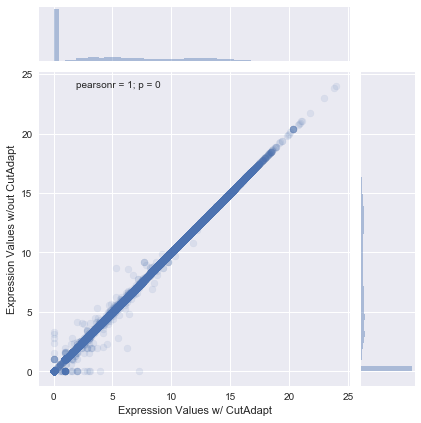

In [24]:
g = sns.jointplot('cut', 'non', data=df)
g.set_axis_labels(xlabel='Expression Values w/ CutAdapt', ylabel='Expression Values w/out CutAdapt')
g.ax_joint.collections[0].set_alpha(0.1)

Some deviation, but heteroskedasity skews the variance towards the lower expression end where you'd expect the most error.